In [1]:
# Black-Scholes-Merton (1973) European Call & Put Valuation

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
from scipy.integrate import quad

In [2]:
# Helper Functions
def dN(x):
    ''' Probability density function of standard normal random variable x.'''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

In [3]:
def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

In [4]:
def d1f(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.
    Parameters see e.g. BSM_call_value function. '''
    
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)* (T - t)) / (sigma * math.sqrt(T - t))
    return d1

In [5]:
# Valuation Functions
def BSM_call_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    Parameters
    ==========
    St: float
    stock/index level at time t
    K: float
    strike price
    t: float
    valuation date
    T: float
    date of maturity/time-to-maturity if t = 0; T > t
    r: float
    constant, risk-less short rate
    sigma: float
    volatility
    Returns
    =======
    call_value: float
    European call present value at t'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2) 
    return call_value

In [6]:
def BSM_put_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European put option value.
    Parameters
    ==========
    St: float
    stock/index level at time t
    K: float
    strike price
    t: float
    valuation date
    T: float
    date of maturity/time-to-maturity if t = 0; T > t
    r: float
    constant, risk-less short rate
    sigma: float
    volatility
    Returns
    =======
    put_value: float
    European put present value at t
    '''
    put_value = BSM_call_value(St, K, t, T, r, sigma) \
    - St + math.exp(-r * (T - t)) * K
    return put_value

In [7]:
# Plotting European Option Values
def plot_values(function):
    ''' Plots European option values for different parameters c.p. '''
    plt.figure(figsize=(10, 8.3))
    points = 100
    #
    # Model Parameters
    #
    St = 100.0 # index level
    K = 100.0 # option strike
    t = 0.0 # valuation date
    T = 1.0 # maturity date
    r = 0.05 # risk-less short rate
    sigma = 0.2 # volatility
    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')
    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')
    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')
    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

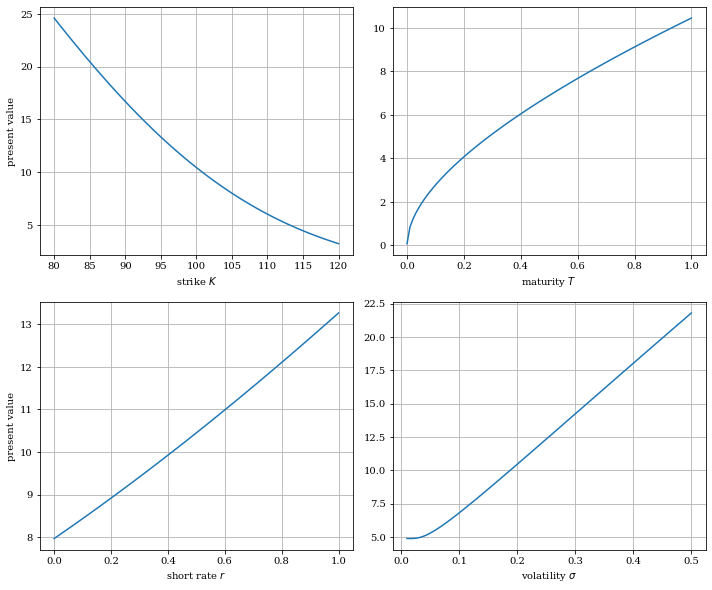

In [8]:
plot_values(BSM_call_value)

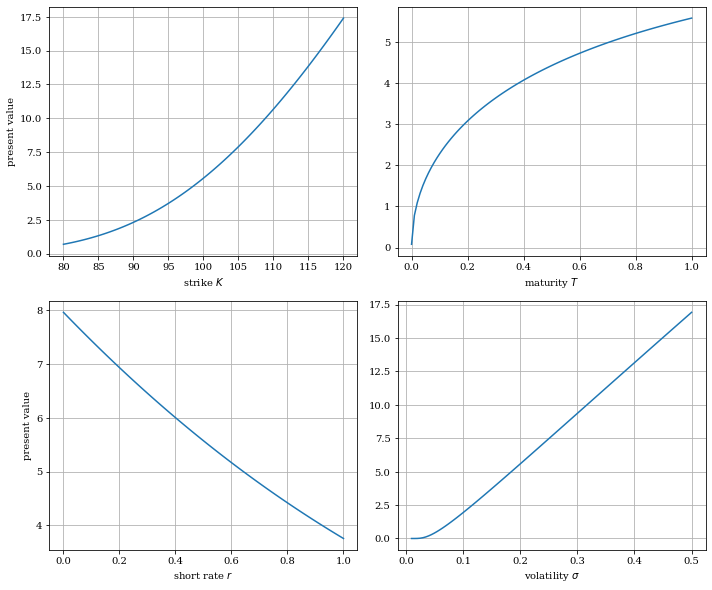

In [9]:
plot_values(BSM_put_value)

In [10]:
St: float
K: float
t: float
T: float
r: float
sigma: float
call_value: float
put_value: float

In [11]:
#St = 100.0 # index level
#K = 100.0 # option strike
#t = 0.0 # valuation date
#T = 1.0 # maturity date
#r = 0.05 # risk-less short rate
#sigma = 0.2 # volatility

In [12]:
#BSM_put_value(St, K, t, T, r, sigma)

In [13]:
#BSM_call_value(St, K, t, T, r, sigma)

In [14]:
#
# Black-Scholes-Merton (1973) European Call Option Greeks
# 05_com/BSM_call_greeks.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
import mpl_toolkits.mplot3d.axes3d as p3
#from BSM_option_valuation import d1f, N, dN

In [15]:
#
# Functions for Greeks
#


def BSM_delta(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton DELTA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    delta : float
        European call option DELTA
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    delta = N(d1)
    return delta

In [16]:
def BSM_gamma(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton GAMMA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    gamma : float
        European call option GAMM
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    gamma = dN(d1) / (St * sigma * math.sqrt(T - t))
    return gamma

In [17]:
def BSM_theta(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton THETA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    theta : float
        European call option THETA
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    theta = -(St * dN(d1) * sigma / (2 * math.sqrt(T - t))
             + r * K * math.exp(-r * (T - t)) * N(d2))
    return theta

In [18]:
def BSM_rho(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton RHO of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    rho : float
        European call option RHO
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    rho = K * (T - t) * math.exp(-r * (T - t)) * N(d2)
    return rho


In [19]:
def BSM_vega(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton VEGA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    vega : float
        European call option VEGA
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    vega = St * dN(d1) * math.sqrt(T - t)
    return vega

In [20]:
#
# Plotting the Greeks
#
def plot_greeks(function, greek):
    # Model Parameters
    St = 100.0  # index level
    K = 100.0  # option strike
    t = 0.0  # valuation date
    T = 1.0  # maturity date
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


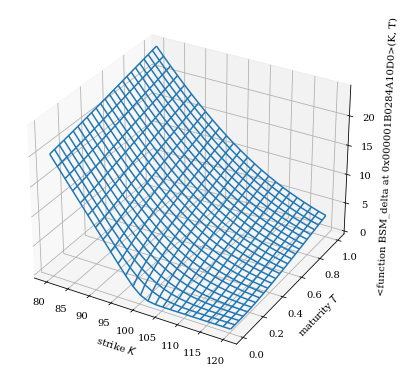

In [21]:
plot_greeks(BSM_call_value, BSM_delta)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


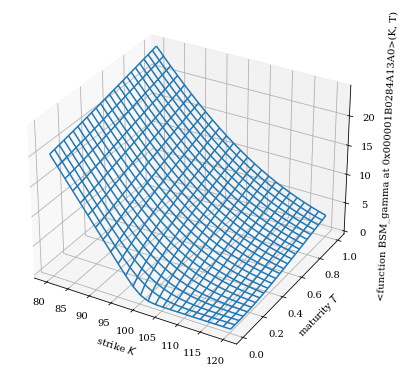

In [22]:
plot_greeks(BSM_call_value, BSM_gamma)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


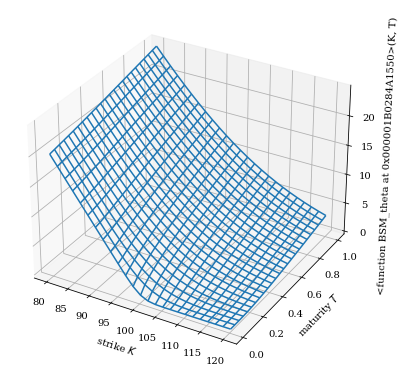

In [23]:
plot_greeks(BSM_call_value, BSM_theta)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


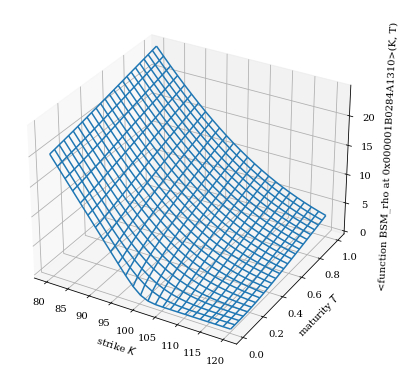

In [24]:
plot_greeks(BSM_call_value, BSM_rho)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


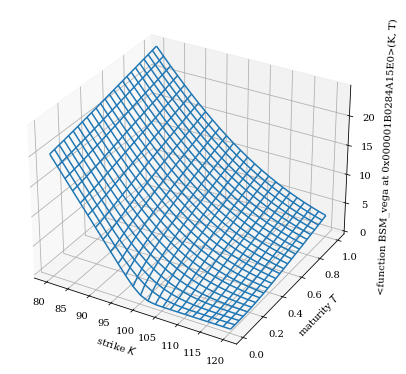

In [25]:
plot_greeks(BSM_call_value, BSM_vega)

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_3876/1954340095.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


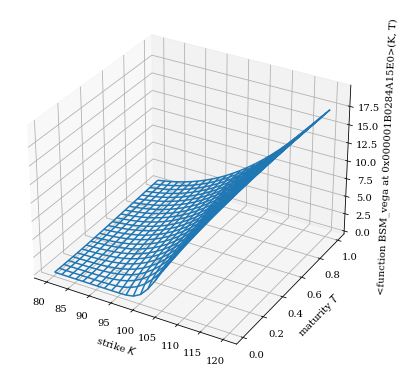

In [26]:
plot_greeks(BSM_put_value, BSM_vega)